# Alternative projection

In [1]:
# Getting all the required library
# using JuMP
# using GLPK
using Plots

In [2]:
# Create the vander function for creating a form of representing the vectors and calculations
vander(t,n) = hcat([t.^i for i = 0:n-1]...)

vander (generic function with 1 method)

In [49]:
# Setting the parameters
T=1:0.01:5 # Interpolation points, note it has to be different from 0 so it's best to pick from 1
(n, m) = (5, 6) # The power of the 2 poly in the rational functions
hy_space_sz = n+m+2
# N = 10
# c = rand(N)
# f(t) = sum([c[i]*sin(π*i*(t+0.25)) for i in 1:N]) # Function to approximate

f(t) = (t^3+3)/(t^2 + 1) #function simple to test

f (generic function with 1 method)

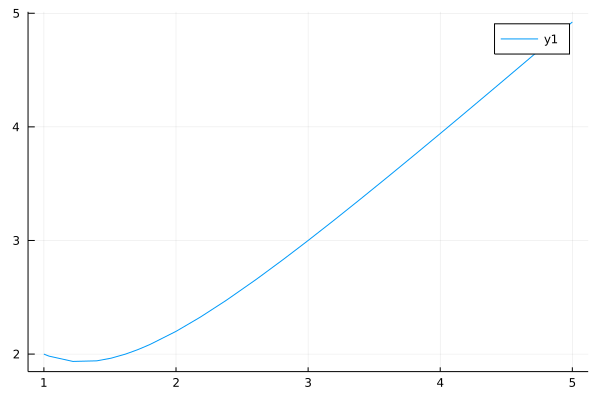

In [50]:
# plot the f to see
plot(f,1,5)

In [51]:
# we are creating hyperplanes by thinking f(x) = p(x)/q(x)
# or converting to <A, xn> - f(x)<B, xm> = 0 with A, B is correspondingly coe of p(x) and q(x) and are the keys
# xn and xm are the vectors which will represent the fucntions
# for easy calculation combining A and B into a big vector so it would be: <A to B, xn to -f(x)xm> = 0
# this is a hyperplan formula with d = 0
# therefore, xn to -f(x)xm is the vector of the hyperplane in R n+m+2 space

# function to calculate the distince between a point and the hyperplane with the sign
function calculateDisAndPoint(check_value, the_point, n, m)
    hy_space_sz = n + m + 2
    xn = vander(check_value, n+1)
    xm = vander(check_value, m+1)
    big_vect = hcat(xn, -f(check_value)*xm)
#     calculate distance by |vect.start_point + d|/||vect|| , d is 0 in this case
    a = sum(hcat([the_point[i]*big_vect[i] for i in 1:hy_space_sz]...))
    b = sum(hcat([big_vect[i]*big_vect[i] for i in 1:hy_space_sz]...))
    c = sqrt(b)
    dis = a/c
#     calculate lambda in x - x0 = lambda.vect to calculate the projectpoint
    lambd = a/b
    x0 = the_point - (lambd * big_vect)
    return dis, x0
end

calculateDisAndPoint (generic function with 1 method)

In [52]:
# iterate after a certain times and store the value in a array of the size of number of hyperplanes
num_hy = size(T)[1]
distA = Array{Float64}(undef, 1, num_hy)
pointA = Array{Array{Float64}}(undef, 1, num_hy)
ite_times = 20
s_p = vander(1, hy_space_sz)

for i in 1:(ite_times*num_hy)
    check = i%num_hy + 1
    result = calculateDisAndPoint(T[check],s_p,n,m)
    distA[check] = result[1]
    pointA[check] = result[2]
    s_p = result[2]
end

In [53]:
# calculate the mid point
mid_p = sum(pointA)/num_hy

1×13 Array{Float64,2}:
 1.19535  1.17  1.14544  1.12804  1.13326  …  0.677191  0.491478  -0.072187

In [78]:
# maximum(mid_p)
findmax(mid_p)[2][2]

6

In [54]:
for i in mid_p
    println(i)
end

1.1953510777690604
1.169999770706346
1.1454391963030806
1.1280357010736761
1.133259474272219
1.1982445346774748
0.5976640604911447
0.6449663232718407
0.6882470051280163
0.7117748903368974
0.6771908712852576
0.4914778419575343
-0.0721870039405266


In [55]:
# we now have the final results
p(t) = sum((t^(i-1))*mid_p[i] for i in 1:(n+1))
q(t) = sum((t^(i-1))*mid_p[i+n+1] for i in 1:(m+1))
g(t) = p(t)/q(t)

g (generic function with 1 method)

In [56]:
g(1.2)

1.920227351145914

In [57]:
f(1.2)

1.9377049180327868

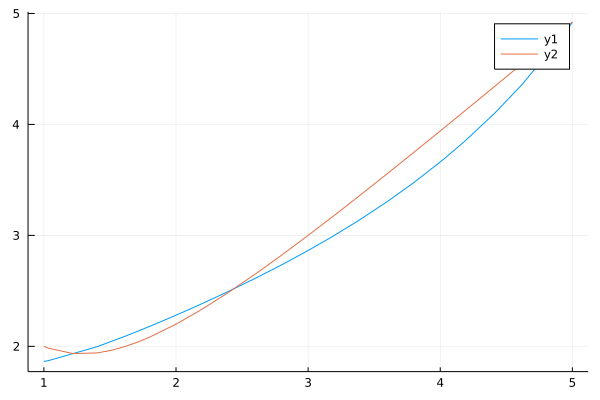

In [64]:
plot(g,1,5)
plot!(f,1,5)

In [59]:
# Find the points of extreme deviation:

σ(t) = g(t) - f(t)
Tmax = maximum(abs.(σ.(T)))
T⁺ = T[findall(t -> σ(t) ≈ Tmax, T)]
T⁻ = T[findall(t -> σ(t) ≈ -Tmax, T)]

1-element Array{Float64,1}:
 4.0

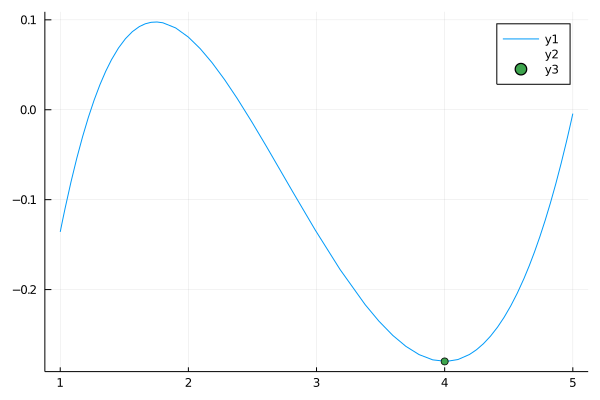

In [60]:
plot(σ,1,5)
scatter!(T⁺,σ.(T⁺))
scatter!(T⁻,σ.(T⁻))